In [444]:
import numpy as np
import matplotlib.pyplot as plt



In [445]:
data = np.load('radio_data.npy')
data.shape

(100, 2, 1573)

In [446]:
np.max(data)

np.float32(0.24896534)

Text(0.5, 1.0, 'Histogram of SNR Peak Values')

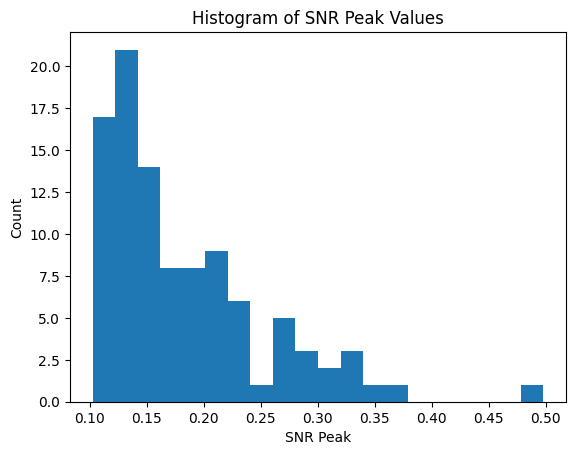

In [447]:
sigma = .5
peaks = np.max(data, axis=(1,2))
snr_pk = peaks / sigma
_=plt.hist(snr_pk, bins=20)
plt.xlabel('SNR Peak')
plt.ylabel('Count')
plt.title('Histogram of SNR Peak Values')
# plt.figure(figsize=(10, 6))
# plt.plot(snr_pk, peaks, 'o', markersize=2)

In [448]:
params = np.load('../data/trecs_gal_params.npy', allow_pickle=True)[()]
params

{'pixelscale': 0.15,
 'Npix': 128,
 'min_pix_size': 3.0,
 'max_pix_size': 40.0,
 'beta_fit_hlr': {'a': np.float64(3.1888667395713575),
  'b': np.float64(43.24191697232753),
  'loc': 0.22499999999999998,
  'scale': 13.875},
 'min_flux': 0.05,
 'max_flux': 0.2,
 'beta_fit_flux': {'a': np.float64(0.9719302943052706),
  'b': np.float64(16.533137644039233),
  'loc': 0.05,
  'scale': 0.7500000000000001},
 'beta_fit_r_ell': {'a': np.float64(20.726495589596606),
  'b': np.float64(25.99702961732686),
  'loc': 0,
  'scale': 1.5}}

In [449]:
# Check scripts for this values
ell_prior_scale = .5
ell_scale = 0.2
g_prior_scale = .3
g_scale = 0.1

samples = np.load('radio_samples.npz')
e1 = samples['e1'] *ell_scale/ell_prior_scale
e2 = samples['e2'] *ell_scale/ell_prior_scale
flux = samples['flux'] * params['beta_fit_flux']['scale'] + params['beta_fit_flux']['loc']
hlr = samples['hlr'] * params['beta_fit_hlr']['scale'] + params['beta_fit_hlr']['loc']
g1 = samples['g1']*g_scale/g_prior_scale
g2 = samples['g2']*g_scale/g_prior_scale

In [450]:
g1.shape

(10, 400000, 1)

/var/folders/9y/7z0g8qdn2bvc23npg8q10qxn7rzw1x/T/ipykernel_29632/1865700026.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(g1[chain,idx], g2[chain,idx], s=10, c=colors[i])


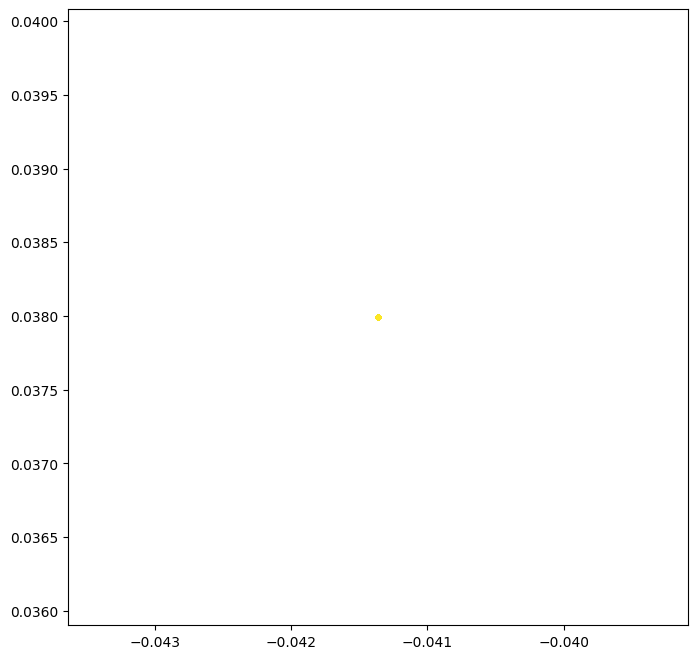

In [451]:
chain = 5
n_samples = g1.shape[1]
n_points = 500
colors = plt.cm.viridis(np.linspace(0, 1, n_points))
plt.figure(figsize=(8, 8))
for i, idx in enumerate(range(0,n_samples,n_samples//n_points)):
    plt.scatter(g1[chain,idx], g2[chain,idx], s=10, c=colors[i])

In [452]:
flatchain = np.std(g1, axis=1) < 1e-3
print(flatchain)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


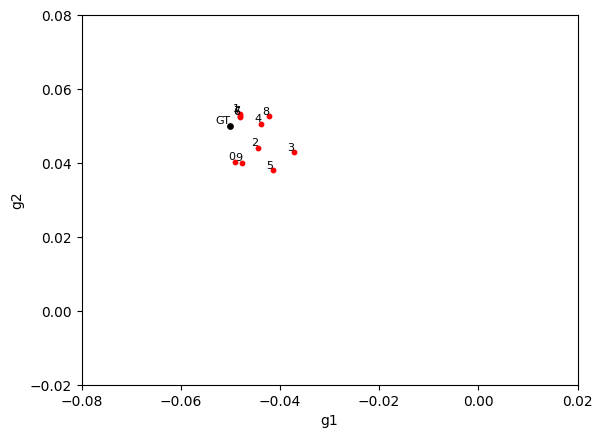

In [453]:
for i in range(g1.shape[0]):
    color = 'r' if flatchain[i] else 'b'
    plt.scatter(g1[i,0], g2[i,0], s=10, c=color)
    plt.text(g1[i,0], g2[i,0], str(i), fontsize=8, ha='right', va='bottom')
    plt.xlim(-.08, .02)
    plt.ylim(-.02, .08)

plt.scatter([-0.05], [0.05], s=15, c='k')
plt.text(-0.05, 0.05, 'GT', fontsize=8, ha='right', va='bottom')
plt.xlabel('g1')
plt.ylabel('g2')
plt.show()

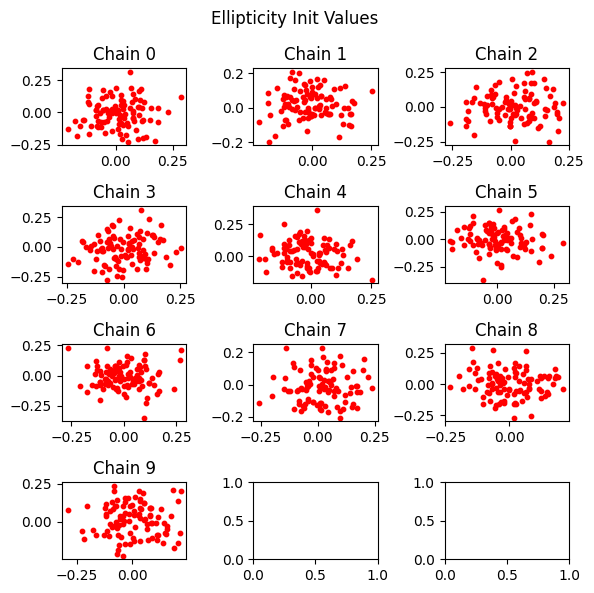

In [465]:
init_val = np.load("radio_init_val.npy", allow_pickle=True).item()
fig, ax = plt.subplots(4,3, figsize=(6, 6))
for idx in range(10):
    color = 'r' if flatchain[idx] else 'b'
    i, j = np.unravel_index(idx, (4, 3))
    ax[i,j].scatter(init_val['e1'][idx,:], init_val['e2'][idx,:], s=10, color=color)
    ax[i,j].set_title(f'Chain {idx}')

plt.suptitle("Ellipticity Init Values")
plt.tight_layout()

In [466]:
init_val['hlr'][0,:] - init_val['hlr'][1,:]

Array([ 0.03914411,  0.04401286, -0.01315306, -0.00593558, -0.02829532,
       -0.00648521, -0.02005742, -0.02944447, -0.01938849,  0.08459979,
        0.11229698,  0.02486835,  0.03927901, -0.05704796, -0.0287963 ,
       -0.01037326, -0.00083862, -0.02421402, -0.02483193,  0.04610376,
       -0.00175841,  0.00373747, -0.05722484,  0.01671067, -0.00874764,
       -0.01206903, -0.03002262, -0.00905307, -0.05139332, -0.02798894,
        0.03337713, -0.02494526, -0.03410228, -0.01748625, -0.02708901,
        0.1021262 ,  0.0232338 , -0.11993258, -0.05439276, -0.01751325,
        0.09630546, -0.03369876,  0.0228196 ,  0.08554225,  0.03071857,
        0.10379468, -0.041572  ,  0.00108126,  0.01998757, -0.04768462,
        0.02657574, -0.02677695, -0.03498001, -0.00730723,  0.02055757,
        0.04002086,  0.07591379,  0.0449753 , -0.00853828, -0.07391515,
        0.14023295, -0.00876406,  0.01994415, -0.04057061,  0.08747493,
        0.03103733, -0.09286454,  0.08655856,  0.13229586,  0.02

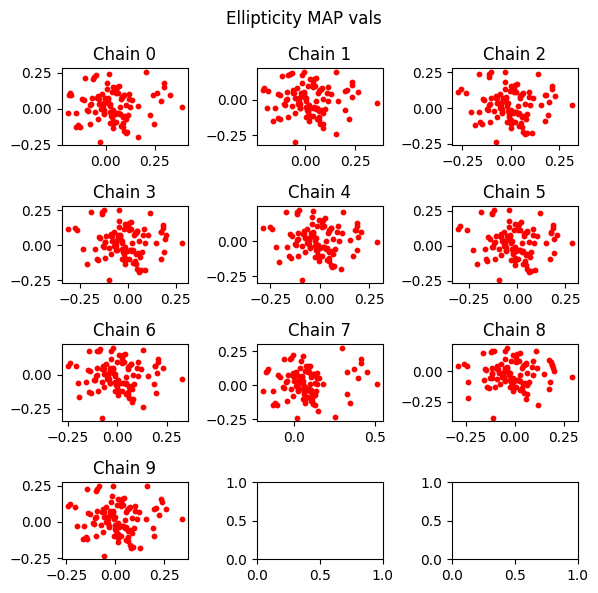

In [467]:
map_val = np.load("radio_map_val.npy", allow_pickle=True).item()
fig, ax = plt.subplots(4,3, figsize=(6, 6))
for idx in range(10):
    color = 'r' if flatchain[idx] else 'b'
    i, j = np.unravel_index(idx, (4, 3))
    ax[i,j].scatter(map_val['e1'][idx,:], map_val['e2'][idx,:], s=10, color=color)
    ax[i,j].set_title(f'Chain {idx}')

plt.suptitle("Ellipticity MAP vals")
plt.tight_layout()

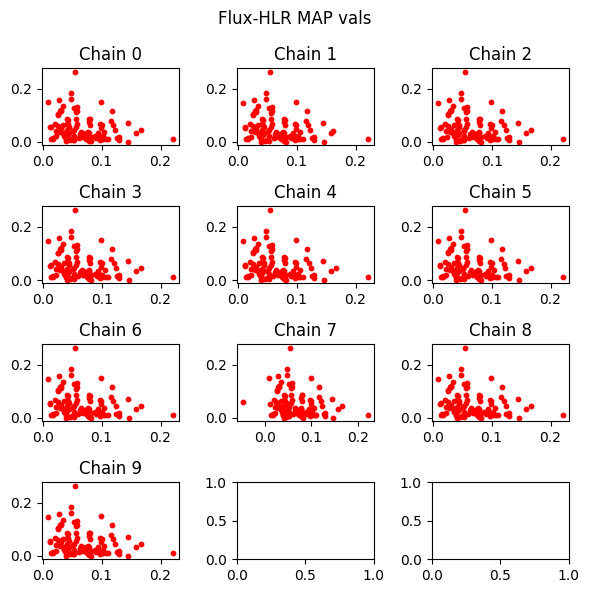

In [468]:
map_val = np.load("radio_map_val.npy", allow_pickle=True).item()
fig, ax = plt.subplots(4,3, figsize=(6, 6))
for idx in range(10):
    color = 'r' if flatchain[idx] else 'b'
    i, j = np.unravel_index(idx, (4, 3))
    ax[i,j].scatter(map_val['hlr'][idx,:], map_val['flux'][idx,:], s=10, color=color)
    ax[i,j].set_title(f'Chain {idx}')

plt.suptitle("Flux-HLR MAP vals")
plt.tight_layout()

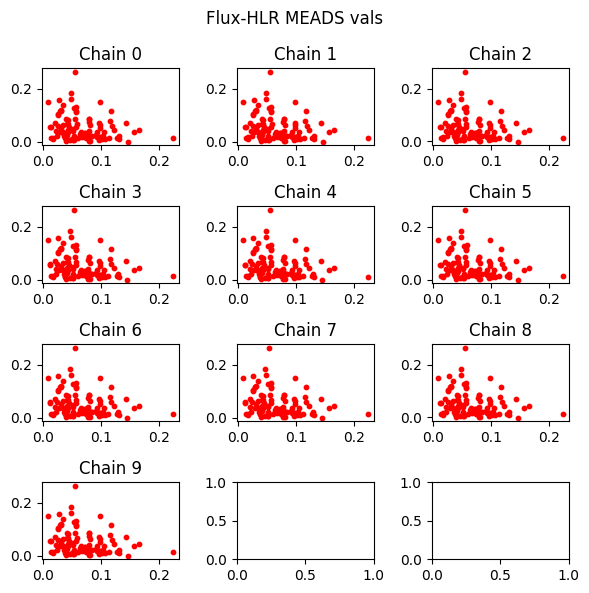

In [459]:
meads_val = np.load("radio_meads_warmup.npy", allow_pickle=True).item()
fig, ax = plt.subplots(4,3, figsize=(6, 6))
for idx in range(10):
    color = 'r' if flatchain[idx] else 'b'
    i, j = np.unravel_index(idx, (4, 3))
    ax[i,j].scatter(meads_val['hlr'][idx,:], meads_val['flux'][idx,:], s=10, color=color)
    ax[i,j].set_title(f'Chain {idx}')

plt.suptitle("Flux-HLR MEADS vals")
plt.tight_layout()

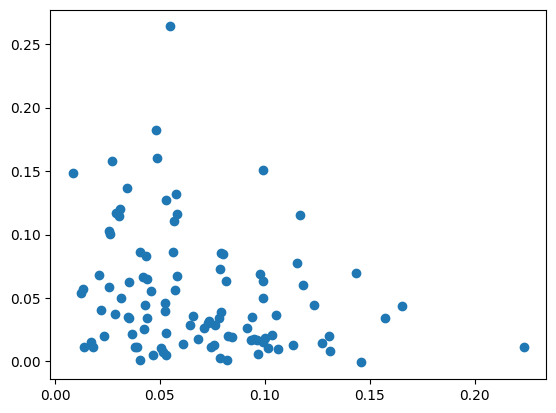

In [464]:
plt.scatter(samples['hlr'][0,1000], samples['flux'][0,1000])


In [436]:
data_params = np.load("../outputs/radio_data_params.npy", allow_pickle=True).item()
e1_data = data_params['e1']
e2_data = data_params['e2']
flux_data = data_params['flux']
hlr_data = data_params['hlr']
g1_data = data_params['g1']
g2_data = data_params['g2']

In [438]:
g2

array([[[0.12086644],
        [0.12086644],
        [0.12086644],
        ...,
        [0.12086644],
        [0.12086644],
        [0.12086644]],

       [[0.15974249],
        [0.15974249],
        [0.15974249],
        ...,
        [0.15974249],
        [0.15974249],
        [0.15974249]],

       [[0.13250868],
        [0.13250868],
        [0.13250868],
        ...,
        [0.13250868],
        [0.13250868],
        [0.13250868]],

       ...,

       [[0.158476  ],
        [0.158476  ],
        [0.158476  ],
        ...,
        [0.158476  ],
        [0.158476  ],
        [0.158476  ]],

       [[0.15789276],
        [0.15789276],
        [0.15789276],
        ...,
        [0.15789276],
        [0.15789276],
        [0.15789276]],

       [[0.12000718],
        [0.12000718],
        [0.12000718],
        ...,
        [0.12000718],
        [0.12000718],
        [0.12000718]]], shape=(10, 400000, 1), dtype=float32)